In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

student_df = pd.read_sql_query('select * from studentsperformance',con=engine)

engine.dispose()

student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
#replacing a score of 0 with 1 for boxcox transformation
student_df['math score'].replace(0,1,inplace=True)

### 1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

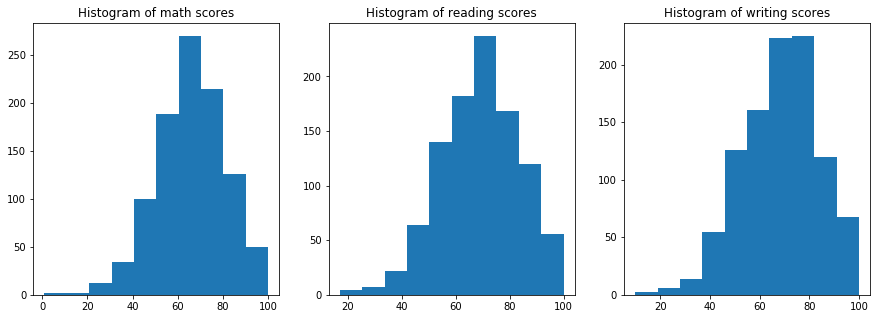

In [4]:
#Plotting exam scores with histograms to see if normally distributed
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(student_df['math score'])
plt.title('Histogram of math scores')

plt.subplot(1,3,2)
plt.hist(student_df['reading score'])
plt.title('Histogram of reading scores')

plt.subplot(1,3,3)
plt.hist(student_df['writing score'])
plt.title('Histogram of writing scores')

plt.show()

All of the histograms have a slight left skew. 

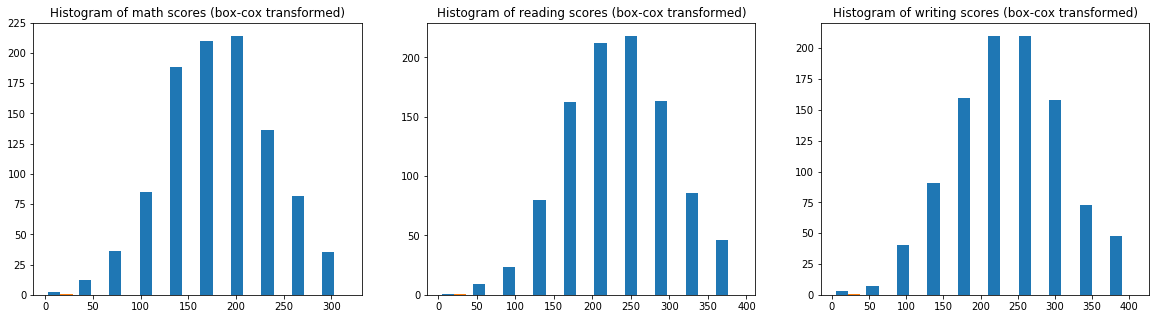

In [5]:
#Histograms of Box-Cox transformed exam scores
plt.figure(figsize=(20,5))

math_boxcox = boxcox(student_df['math score'])
reading_boxcox = boxcox(student_df['reading score'])
writing_boxcox = boxcox(student_df['writing score'])

plt.subplot(1, 3, 1)
plt.hist(math_boxcox)
plt.title('Histogram of math scores (box-cox transformed)')

plt.subplot(1, 3, 2)
plt.hist(reading_boxcox)
plt.title('Histogram of reading scores (box-cox transformed)')

plt.subplot(1, 3, 3)
plt.hist(writing_boxcox)
plt.title('Histogram of writing scores (box-cox transformed)')

plt.show()

All of the box-cox transformed histograms resemble a more normal distribution than the raw histograms.

### 2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

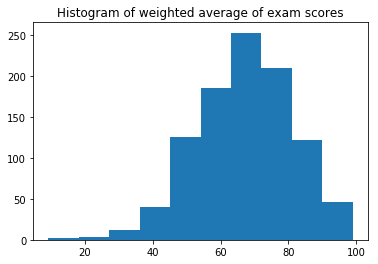

In [6]:
#Histogram of weighted average of exam scores
weighted_avg = student_df['math score']*(.33) + student_df['reading score']*(.33) + student_df ['writing score']*(.33)

plt.hist(weighted_avg)
plt.title('Histogram of weighted average of exam scores')

plt.show()

The histogram of the weighted average skews left.  

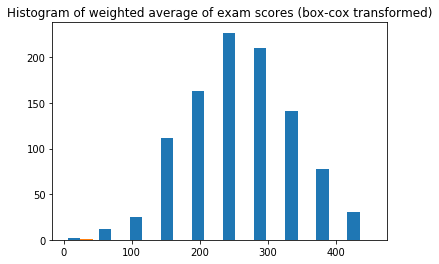

In [7]:
#Histogram of boxcox transformed weighted average

weighted_avg_boxcox = boxcox(weighted_avg)
plt.hist(weighted_avg_boxcox)
plt.title('Histogram of weighted average of exam scores (box-cox transformed)')

plt.show()

The box-cox transformed histogram resembles a normal distribution. 

### 3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

I think the variable test preparation course is probably the biggest determinant of success in exams.  However, I also think that parental level of education, gender, and lunch are variables that potentially determine success in exams.  